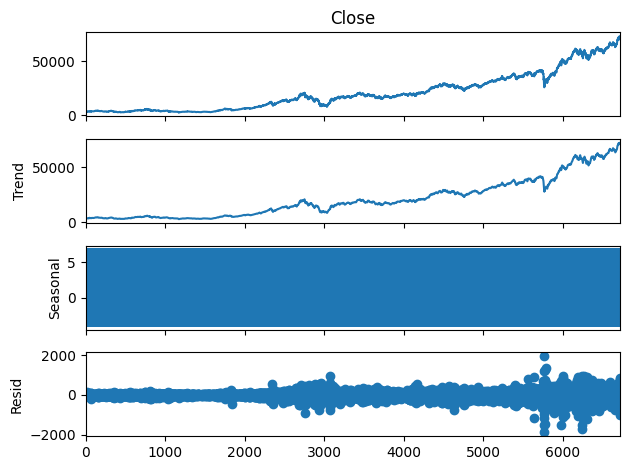

Trend Component:
0    3187.9948
1    3214.6498
2    3253.2460
3    3258.9100
4    3286.3400
Name: trend, dtype: float64

Seasonal Component:
0    1.781120
1   -1.996001
2   -2.653824
3    6.783468
4   -3.914763
Name: seasonal, dtype: float64

Residual Component:
0    70.784080
1    12.586201
2    13.407824
3   -13.383468
4   -18.305237
Name: resid, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the time series data
# Replace 'your_file.csv' with your actual file path
# df = pd.read_csv('sensex.csv', parse_dates=['Date'], index_col='Date')
df = pd.read_csv('sensex.csv', parse_dates=['Date'], index_col=False)

# # Ensure the data is sorted by date
# df.sort_index(inplace=True)

# # If your data has missing dates, you might need to fill or interpolate them
# df = df.asfreq('D')  # Assuming daily frequency, adjust as needed
# df['Close'].interpolate(inplace=True)

# # Step 2: Decompose the time series
# # Here, 'Price' is the column containing the stock prices
result = seasonal_decompose(df['Close'], model='additive', extrapolate_trend='freq',period=5)

# # Step 3: Plot the decomposed components
result.plot()
plt.show()

# # Step 4: Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# # Print the first few rows of each component
print("Trend Component:")
print(trend.head())
print("\nSeasonal Component:")
print(seasonal.head())
print("\nResidual Component:")
print(residual.head())


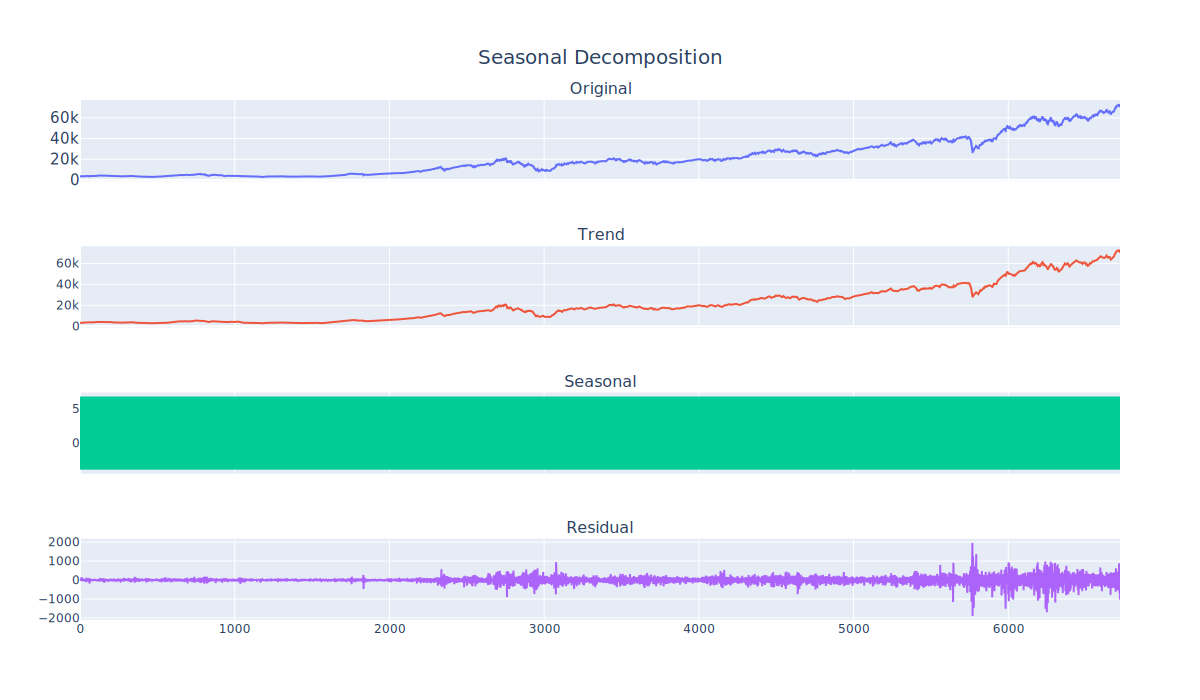

In [3]:
# osition.seasonal import STL, FourierDecomposition, MultiSeasonalDecomposition
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def decomposition_plot(
        ts_index, observed=None, seasonal=None, trend=None, resid=None
    ):
        """Plots the decomposition output
        """
        series = []
        if observed is not None:
            series += ["Original"]
        if trend is not None:
            series += ["Trend"]
        if seasonal is not None:
            series += ["Seasonal"]
        if resid is not None:
            series += ["Residual"]
        if len(series) == 0:
            raise ValueError(
                "All component flags were off. Need atleast one of the flags turned on to plot."
            )
        fig = make_subplots(
            rows=len(series), cols=1, shared_xaxes=True, subplot_titles=series
        )
        x = ts_index
        row = 1
        if observed is not None:
            fig.append_trace(
                go.Scatter(x=x, y=observed, name="Original"), row=row, col=1
            )
            row += 1
        if trend is not None:
            fig.append_trace(
                go.Scatter(x=x, y=trend, name="Trend"), row=row, col=1
            )
            row += 1
        if seasonal is not None:
            fig.append_trace(
                go.Scatter(x=x, y=seasonal, name="Seasonal"),
                row=row,
                col=1,
            )
            row += 1
        if resid is not None:
            fig.append_trace(
                go.Scatter(x=x, y=resid, name="Residual"), row=row, col=1
            )
            row += 1

        fig.update_layout(
            title_text="Seasonal Decomposition",
            autosize=False,
            width=1200,
            height=700,
            title={"x": 0.5, "xanchor": "center", "yanchor": "top"},
            titlefont={"size": 20},
            legend_title=None,
            showlegend=False,
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
        return fig
fig = decomposition_plot(df.index, result.observed, result.seasonal, result.trend, result.resid)
# fig.write_image("imgs/chapter_3/moving_avg_decomposition.png")
fig.show(renderer="svg")

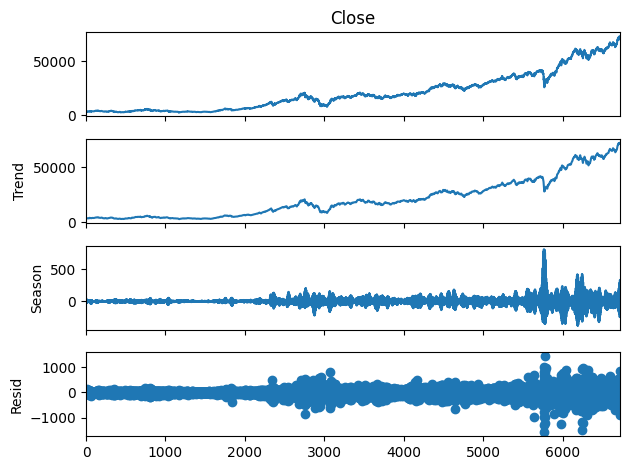

In [5]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['Close'], seasonal=13, period=5)
res = stl.fit()
fig = res.plot()


In [36]:
print(df.index.min())
print(df.index.max())

0
6722


In [50]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


In [51]:
adf_test(df['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    1.854100
p-value                           0.998450
#Lags Used                       35.000000
Number of Observations Used    6687.000000
Critical Value (1%)              -3.431328
Critical Value (5%)              -2.861972
Critical Value (10%)             -2.567000
dtype: float64


Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis can not be rejected. Hence, the series is non-stationary.
because p-value is not less than 0.05 it is greater.

In [52]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [53]:
kpss_test(df['Close'])

Results of KPSS Test:
Test Statistic           11.293514
p-value                   0.010000
Lags Used                51.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/var/folders/g6/ylqy09q54v911zyx1bmf687c0000gp/T/ipykernel_78221/962505956.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


<Axes: >

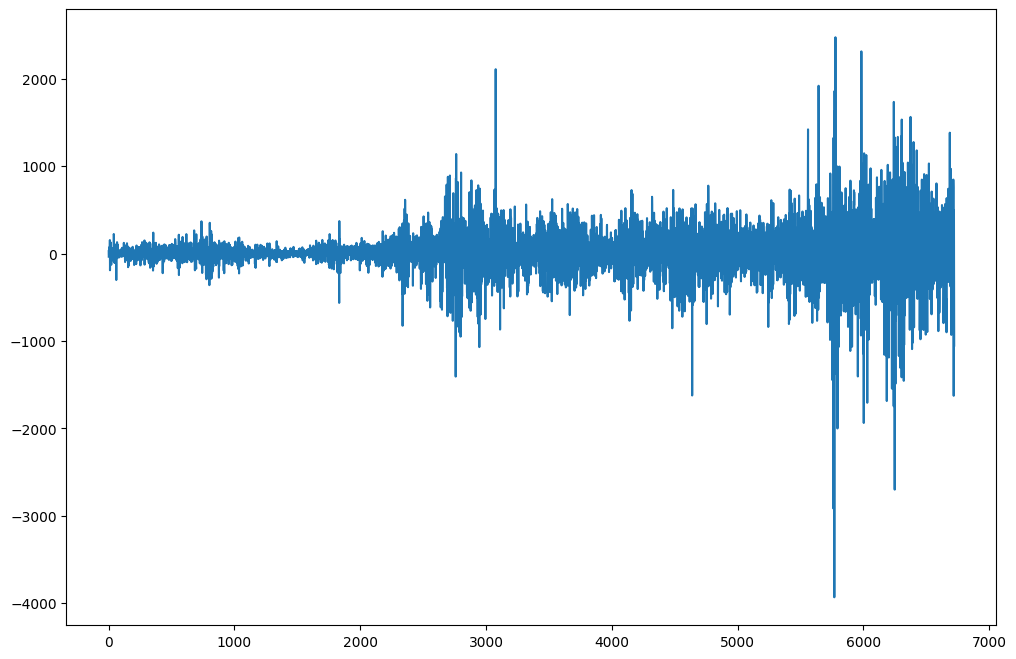

In [55]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
df['Close_diff'].dropna().plot(figsize=(12, 8))                                      

In [57]:
adf_test(df['Close_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.421181e+01
p-value                        1.716339e-26
#Lags Used                     3.500000e+01
Number of Observations Used    6.686000e+03
Critical Value (1%)           -3.431328e+00
Critical Value (5%)           -2.861972e+00
Critical Value (10%)          -2.567000e+00
dtype: float64


p value is very small and less than even 0.01 which means that the time series is now stationary

In [58]:
kpss_test(df['Close'].dropna())

Results of KPSS Test:
Test Statistic           11.293514
p-value                   0.010000
Lags Used                51.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/var/folders/g6/ylqy09q54v911zyx1bmf687c0000gp/T/ipykernel_78221/962505956.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
